In [0]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
import pandas as pd
import numpy as np
import os
import tqdm
import keras

from keras_preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img, image
from keras.applications.densenet import DenseNet169,preprocess_input
from keras.applications.inception_v3 import InceptionV3
from keras.initializers import glorot_uniform
from keras.models import Model
from keras.layers import Dense, Activation
from keras import regularizers
from keras.callbacks import EarlyStopping, TensorBoard

Using TensorFlow backend.


In [0]:
DATASET_DIR  = '/gdrive/My Drive/MURA/'
TRAIN_DIR    = DATASET_DIR + 'MURA-v1.2/train/'
VAL_DIR      = DATASET_DIR + 'MURA-v1.2/valid/'
PART_NAME    = 'XR_HAND'
TRAIN_LABELS = DATASET_DIR+'train_labeled_studies.csv'
VAL_LABELS   = DATASET_DIR+'valid_labeled_studies.csv'

In [0]:
train_labels = pd.read_csv(TRAIN_LABELS, header = None)
val_labels   = pd.read_csv(VAL_LABELS, header = None)

In [0]:
train_labels = train_labels.set_index(0).T.to_dict('list')
val_labels = val_labels.set_index(0).T.to_dict('list')

In [0]:
def prepare_data(labels, data_path, part, mode):
    BASE_DIR = 'MURA-v1.1/'+mode+'/'+part+'/'
    FILE_DIR = 'MURA-v1.2/'+mode+'/'+part+'/'
    df = pd.DataFrame(columns = ['Path', 'Label'])
    i=0
    for patient in os.listdir(data_path):
        for study in os.listdir(data_path+'/'+patient):
            for img in os.listdir(data_path+'/'+patient+'/'+study):
                if '_' not in list(img):
                    path = FILE_DIR+patient+'/'+study+'/'
                    label_path = BASE_DIR+patient+'/'+study+'/'
                    df.loc[i] = [path+img, int(labels[label_path][0])]
                    i=i+1
    return df
    

In [0]:
train_data = prepare_data(train_labels, TRAIN_DIR+PART_NAME, PART_NAME,'train')
val_data = prepare_data(val_labels, VAL_DIR+PART_NAME, PART_NAME,'valid')

In [0]:
train_data

,Path,Label
0,MURA-v1.2/train/XR_HAND/patient10803/study1_ne...,0
1,MURA-v1.2/train/XR_HAND/patient10803/study1_ne...,0
2,MURA-v1.2/train/XR_HAND/patient10454/study1_ne...,0
3,MURA-v1.2/train/XR_HAND/patient10454/study1_ne...,0
4,MURA-v1.2/train/XR_HAND/patient10250/study1_ne...,0
5,MURA-v1.2/train/XR_HAND/patient10250/study1_ne...,0
6,MURA-v1.2/train/XR_HAND/patient10250/study1_ne...,0
7,MURA-v1.2/train/XR_HAND/patient10980/study1_ne...,0
8,MURA-v1.2/train/XR_HAND/patient10980/study1_ne...,0
9,MURA-v1.2/train/XR_HAND/patient01344/study1_ne...,0


In [0]:
train_data['Label'] = pd.to_numeric(train_data['Label'])
val_data['Label'] = pd.to_numeric(val_data['Label'])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


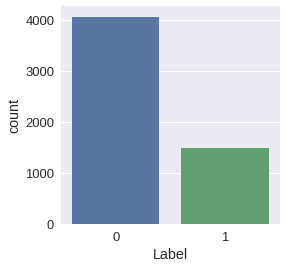

In [0]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set(style="darkgrid")
sns.set(font_scale=1.3)

sns.factorplot(x="Label", data=train_data, kind="count")
plt.show();

In [0]:
def build_model():
  
    base_model = InceptionV3(
                          weights=None, 
                          input_shape=(224, 224, 1), 
                          pooling='max', 
                          classes=1)

    
    for layer in base_model.layers:
        layer.trainable = True

    x = base_model.output
    x = Dense(1000, kernel_regularizer=regularizers.l1_l2(0.01), activity_regularizer=regularizers.l2(0.01))(x)
    x = Activation('relu')(x)
    x = Dense(500, kernel_regularizer=regularizers.l1_l2(0.01), activity_regularizer=regularizers.l2(0.01))(x)
    x = Activation('relu')(x)
    
    predictions = Dense(1,activation='sigmoid')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    
    return model

In [0]:
model = build_model()
nadam=keras.optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
model.compile(loss='binary_crossentropy', optimizer=nadam, metrics=['acc', 'mse'])

In [0]:
NUM_SAMPLES=train_data.shape[0]
VAL_SIZE=val_data.shape[0]
BATCH_SIZE=128
NUM_EPOCHS = 10

In [0]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    zoom_range=0.2,
    rotation_range=5,
    horizontal_flip=True
)

In [0]:
train_generator = train_datagen.flow_from_dataframe(
    dataframe = train_data, 
    directory  = DATASET_DIR,
    x_col = "Path", 
    y_col = "Label", 
    target_size=(224, 224),
    color_mode='grayscale', 
    class_mode='other', 
    batch_size=32
)

Found 5543 images.


In [0]:
val_datagen = ImageDataGenerator(
    rescale = 1. /255)

In [0]:
val_generator = val_datagen.flow_from_dataframe(
    dataframe = val_data, 
    directory  = DATASET_DIR, 
    x_col = "Path", 
    y_col = "Label", 
    target_size=(224, 224),
    color_mode='grayscale', 
    class_mode='other', 
    batch_size=32
)

Found 460 images.


In [0]:
model.fit_generator(
    generator = train_generator, 
    steps_per_epoch = NUM_SAMPLES/BATCH_SIZE,
    epochs=NUM_EPOCHS,
    verbose=1, 
    callbacks=[
        EarlyStopping(
            monitor='val_loss',
            patience=7, 
            min_delta=0.0001
        ),
        TensorBoard(
            log_dir='Graph_complete', 
            histogram_freq=0, 
            write_graph=True, 
            write_images=True
        )
    ], 
    validation_data=val_generator, 
    validation_steps = VAL_SIZE/BATCH_SIZE,
    shuffle=True
)

Epoch 1/10
44/43 [==============================] - 958s 22s/step - loss: 47.1368 - acc: 0.7123 - mean_squared_error: 0.2250 - val_loss: 3.6497 - val_acc: 0.5278 - val_mean_squared_error: 0.2588
Epoch 2/10
44/43 [==============================] - 943s 21s/step - loss: 3.5228 - acc: 0.7237 - mean_squared_error: 0.2061 - val_loss: 3.6012 - val_acc: 0.5938 - val_mean_squared_error: 0.2496
Epoch 3/10
44/43 [==============================] - 945s 21s/step - loss: 3.4626 - acc: 0.7330 - mean_squared_error: 0.1991 - val_loss: 3.5335 - val_acc: 0.6016 - val_mean_squared_error: 0.2472
Epoch 4/10
44/43 [==============================] - 945s 21s/step - loss: 3.4305 - acc: 0.7415 - mean_squared_error: 0.1942 - val_loss: 3.5391 - val_acc: 0.6328 - val_mean_squared_error: 0.2358
Epoch 5/10
44/43 [==============================] - 933s 21s/step - loss: 3.4161 - acc: 0.7371 - mean_squared_error: 0.1959 - val_loss: 3.5338 - val_acc: 0.5278 - val_mean_squared_error: 0.2723
Epoch 6/10
44/43 [===========

In [0]:
# Save Model
model.save_weights('weight_'+PART_NAME+'.h5')
with open('arch_'+PART_NAME+'.json', 'w') as f:
    f.write(model.to_json())

In [0]:
test_generator = val_datagen.flow_from_dataframe(
    dataframe = val_data, 
    directory  = DATASET_DIR, 
    x_col = "Path", 
    y_col = "Label", 
    target_size=(224, 224),
    color_mode='grayscale', 
    class_mode='other', 
    batch_size=1,
    shuffle=False
)

pred = model.predict_generator(test_generator, VAL_SIZE)

Found 460 images.


In [0]:
pred

array([[0.32256043],
       [0.32256043],
       [0.32256043],
       [0.32256043],
       [0.32256043],
       [0.32256043],
       [0.32256043],
       [0.32256043],
       [0.32256043],
       [0.32256043],
       [0.32256043],
       [0.32256043],
       [0.32256043],
       [0.32256043],
       [0.32256043],
       [0.32256043],
       [0.32256043],
       [0.32256043],
       [0.32256043],
       [0.32256043],
       [0.32256043],
       [0.32256043],
       [0.32256043],
       [0.32256043],
       [0.32256043],
       [0.32256043],
       [0.32256043],
       [0.32256043],
       [0.32256043],
       [0.32256043],
       [0.32256043],
       [0.32256043],
       [0.32256043],
       [0.32256043],
       [0.32256043],
       [0.32256043],
       [0.32256043],
       [0.32256043],
       [0.32256043],
       [0.32256043],
       [0.32256043],
       [0.32256043],
       [0.32256043],
       [0.32256043],
       [0.32256043],
       [0.32256043],
       [0.32256043],
       [0.322

In [0]:
STUDY_COUNT = len(val_labels)

study_labels = np.zeros(shape=(STUDY_COUNT,))

for study in val_labels:
  study1 = study.split('/')[1:]
  study1 = 'MURA-v1.2/'+'/'.join(study1)
  imgs = os.listdir(DATASET_DIR+study1)
  avg = 0
  for i in imgs:
    img = image.load_img(DATASET_DIR+study1+'/'+i, target_size=(224, 224),grayscale=True)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    img = np.vstack([x])
    pred = model.predict(img)
    avg = avg+pred[0][0]
  avg=avg/len(imgs)
  label = [0 if avg<0.5 else 1]
  print(label, val_labels[study])

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:98: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


[0] [1]
[0] [1]
[0] [1]
[0] [1]
[0] [1]
[0] [1]
[0] [1]
[0] [1]
[0] [1]
[0] [1]
[0] [1]
[0] [1]
[0] [1]
[0] [1]
[0] [1]
[0] [1]
[0] [1]
[0] [0]
[0] [1]
[0] [1]
[0] [1]
[0] [1]
[0] [1]
[0] [1]
[0] [1]
[0] [1]
[0] [1]
[0] [1]
[0] [1]
[0] [1]
[0] [1]
[0] [0]
[0] [1]
[0] [0]
[0] [1]
[0] [1]
[0] [1]
[0] [1]
[0] [1]
[0] [1]
[0] [1]
[0] [1]
[0] [1]
[0] [1]
[0] [0]
[0] [1]
[0] [1]
[0] [1]
[0] [1]
[0] [1]
[0] [0]
[0] [0]
[0] [1]
[0] [0]
[0] [1]
[0] [1]
[0] [0]
[0] [1]
[0] [1]
[0] [1]
[0] [0]
[0] [1]
[0] [1]
[0] [1]
[0] [1]
[0] [1]
[0] [1]
[0] [0]
[0] [1]
[0] [1]
[0] [1]
[0] [1]
[0] [1]
[0] [1]
[0] [1]
[0] [1]
[0] [1]
[0] [1]
[0] [1]
[0] [1]
[0] [1]
[0] [1]
[0] [1]
[0] [0]
[0] [1]
[0] [1]
[0] [1]
[0] [1]
[0] [1]
[0] [1]
[0] [1]
[0] [1]
[0] [1]
[0] [1]
[0] [0]
[0] [0]
[0] [1]
[0] [1]
[0] [1]
[0] [0]
[0] [1]
[0] [1]
[0] [1]
[0] [1]
[0] [1]
[0] [0]
[0] [0]
[0] [0]
[0] [1]
[0] [1]
[0] [1]
[0] [1]
[0] [1]
[0] [1]
[0] [0]
[0] [0]
[0] [0]
[0] [0]
[0] [0]
[0] [0]
[0] [0]
[0] [0]
[0] [0]
[0] [0]
[0] [0]


KeyboardInterrupt: ignored